In [1]:
import pandas as pd
import numpy as np

from openbb_terminal.sdk import openbb

c:\Users\chadc\anaconda3\envs\quant-stack\lib\site-packages\openbb_terminal\stocks\options\tmx_model.py:52: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  options_listings = pd.read_html(r.text)


Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

In [2]:
spy = openbb.stocks.load(
    "SPY", 
    start_date="2023-01-01", 
    end_date="2024-09-30"
)

Loading Daily data for SPY with starting period 2023-01-03.

## Step 2: Prepare Data

In [4]:
# compute log returns
spy["log_return"] = spy['Adj Close'].apply(np.log).diff(1)

In [5]:
# add a column with the day of the month
spy["day_of_month"] = spy.index.day

In [6]:
# add a column with the year
spy["year"] = spy.index.year

## Step 3: Investigate Our Hypothesis


In [7]:
# group by day number of the month
grouped_by_day = spy.groupby("day_of_month").log_return.mean()

<Axes: title={'left': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

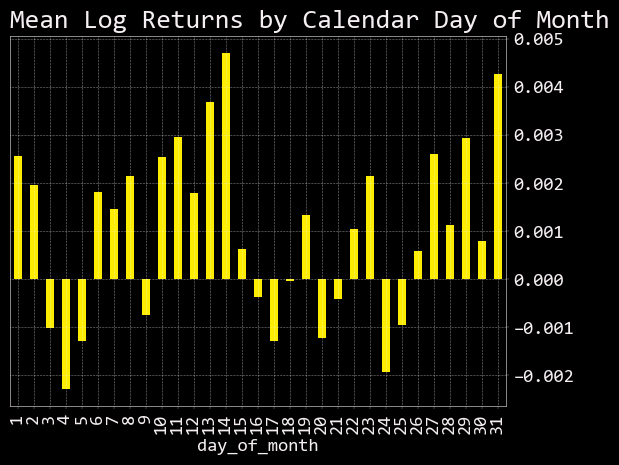

In [8]:
# plot the mean returns across the entire sample period
# we see evidence of the effect
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

## Step 4: Build A Simple Trading Strategy


In [9]:
# simple trading strategy
# buy 7 days before the end of the month sell on first day of the month

In [12]:
# grab the returns within the first week for aggregation purposes
spy["first_week_returns"] = 0.0
spy.loc[spy.day_of_month <= 7, "first_week_returns"] = spy[
    spy.day_of_month <= 7
].log_return

In [13]:
# grab the returns within the last week for aggregation purposes
spy["last_week_returns"] = 0.0
spy.loc[spy.day_of_month >= 23, "last_week_returns"] = spy[
    spy.day_of_month >= 23
].log_return

In [14]:
# simulate a simple strategy where we are short the first week and long the last week
spy["last_week_less_first_week"] = spy.last_week_returns - spy.first_week_returns

## Step 5: Plot Returns


<Axes: title={'left': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

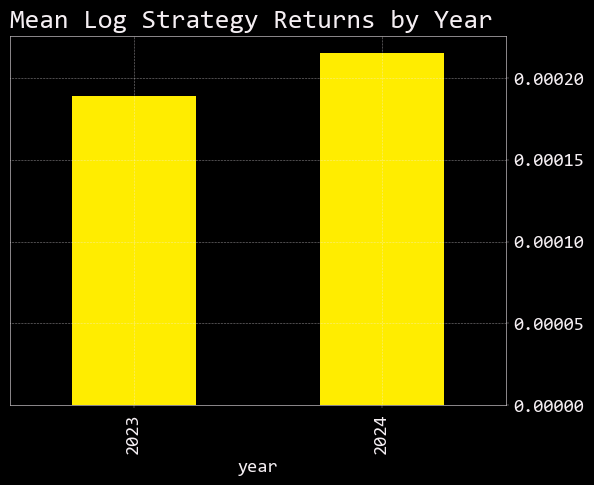

In [15]:
# group and mean the returns each year

(
    spy.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

<Axes: title={'left': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

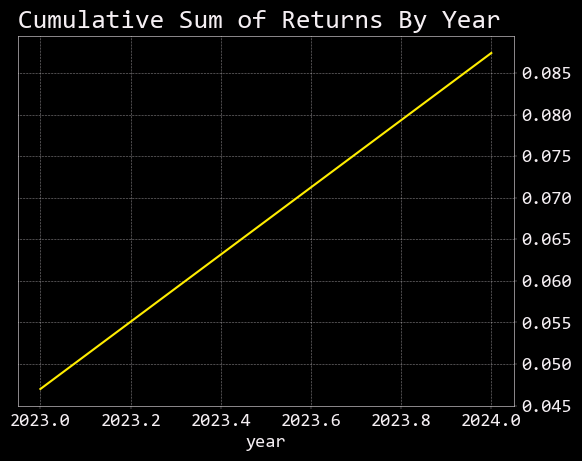

In [16]:
(
    spy.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
)

<Axes: title={'left': 'Cumulative Sum of Returns By Day'}, xlabel='date'>

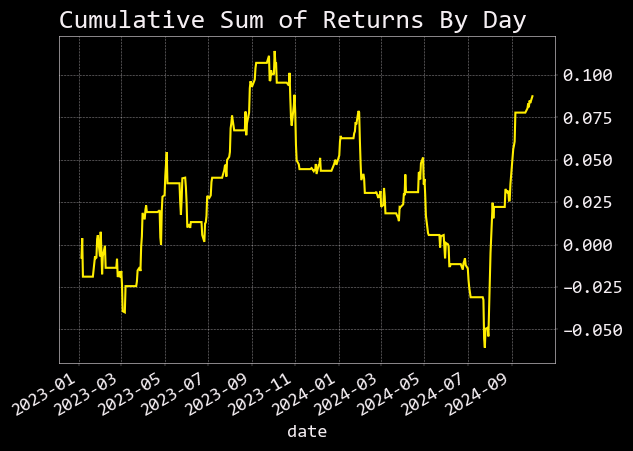

In [17]:
spy.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")